<h1>Importing Libraries</h1>

Please run "pip install -r requirements.txt" from the root of the project 

In [36]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\chanj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
import warnings
# Disable all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h1>Titanic Dataset</h1>

https://www.kaggle.com/c/titanic/data

<h2> Variable Notes </h2>

| Variable  | Definition                  | Key                                            |
|-----------|-----------------------------|------------------------------------------------|
| survival  | Survival                    | 0 = No, 1 = Yes                                |
| pclass    | Ticket class                | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex       | Sex                         |                                                |
| Age       | Age in years                |                                                |
| sibsp     | # of siblings / spouses aboard the Titanic |                                      |
| parch     | # of parents / children aboard the Titanic |                                      |
| ticket    | Ticket number               |                                                |
| fare      | Passenger fare              |                                                |
| cabin     | Cabin number                |                                                |
| embarked  | Port of Embarkation         | C = Cherbourg, Q = Queenstown, S = Southampton |


<h1>Data Preparation</h1>

Here the goal is to make the necessary manipulations so that the models will accept them.
This includes filling in Nan (Not a number) values in the pandas.

In [19]:

label_encoder = preprocessing.LabelEncoder()
current_directory = os.getcwd()
titanic = pd.read_csv(current_directory+'\\titanic.csv')

# Operations to create a distinct value that I know I can encode.
titanic["Cabin"].fillna("Not Known")
titanic["Embarked"].fillna("Not Known")
titanic["Sex"].fillna("Not Known")
titanic["Ticket"].fillna("Not Known")
titanic["Name"].fillna("Not Known")

# Encoding the values in these columns then replacing the columns with the encoded version
titanic["Cabin"] = label_encoder.fit_transform(titanic["Cabin"])
titanic["Name"] = label_encoder.fit_transform(titanic["Name"])
titanic["Sex"] = label_encoder.fit_transform(titanic["Sex"])
titanic["Ticket"] = label_encoder.fit_transform(titanic["Ticket"])
titanic["Embarked"] = label_encoder.fit_transform(titanic["Embarked"])

titanic_labels = titanic["Survived"]
# The Survived column can be disgarded now as we have separated it from the features into its own variable.
titanic = titanic.drop("Survived", axis=1)

<h1>Data Splitting and Final Data Manipulations </h1>

A reason to do fillna that would uses an aggregate (sum, mean, min, etc.) is to prevent data leaking between the training set and test set!

In [20]:
# Play around and see what happens to the models when you change the test-training ratios
train_size = 0.8
test_size = 1 - train_size
assert train_size + test_size == 1

# I decided to drop the Name column as I believe it to generate unique values when encoded 
titanic.drop("Name",axis=1, inplace=True)

# train_test_split this is a method that scikit-learn provides in the library
titanic_train, titanic_test, labels_train, labels_test = train_test_split(titanic,titanic_labels , train_size=train_size, random_state=42)

In [21]:
'''
both ways are valid
we do fillna here instead of above as we want to avoid data leaking since an average would 
use all the data in the column before splitting
'''
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].mean())


<h1>Quick Check</h1>

Always good idea to validate that your data manipulations/operations expectations matches your results.

In [22]:
titanic.loc[titanic["Age"].isna()==True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,1,NaN,0,0,275,8.4583,147,1
17,18,2,1,NaN,0,0,151,13.0000,147,2
19,20,3,0,NaN,0,0,184,7.2250,147,0
26,27,3,1,NaN,0,0,179,7.2250,147,0
28,29,3,0,NaN,0,0,283,7.8792,147,1
...,...,...,...,...,...,...,...,...,...,...
859,860,3,1,NaN,0,0,178,7.2292,147,0
863,864,3,0,NaN,8,2,568,69.5500,147,2
868,869,3,1,NaN,0,0,309,9.5000,147,2
878,879,3,1,NaN,0,0,363,7.8958,147,2


In [23]:
titanic_train.loc[titanic_train["Age"].isna()==True]
# no rows should appear

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [24]:
titanic_test.loc[titanic_test["Age"].isna()==True]
# no rows should appear

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
def metrics(true_y,prediction_y):
    print(f"Accuracy: {accuracy_score(y_true=true_y,y_pred= prediction_y)}")
    print(f"Precision (Weighted): {precision_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"Recall (Weighted): {recall_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"F1 Score (Weighted): {f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')}")
    print(classification_report(y_true=true_y,y_pred= prediction_y, zero_division='warn'))
    confusion_matrix(y_true=true_y,y_pred= prediction_y)

<h2>2.2 Training and Test data split</h2>

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html)
with the default parameters.</h2>

In [26]:
classifier = MultinomialNB()
if (os.path.exists('models/MNB1_model.pickle')):
    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/MNB1_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
pickle_in.close()

Accuracy: 0.7150837988826816
Precision (Weighted): 0.7123686733928125
Recall (Weighted): 0.7150837988826816
F1 Score (Weighted): 0.7126068335103507
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       105
           1       0.67      0.61      0.64        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



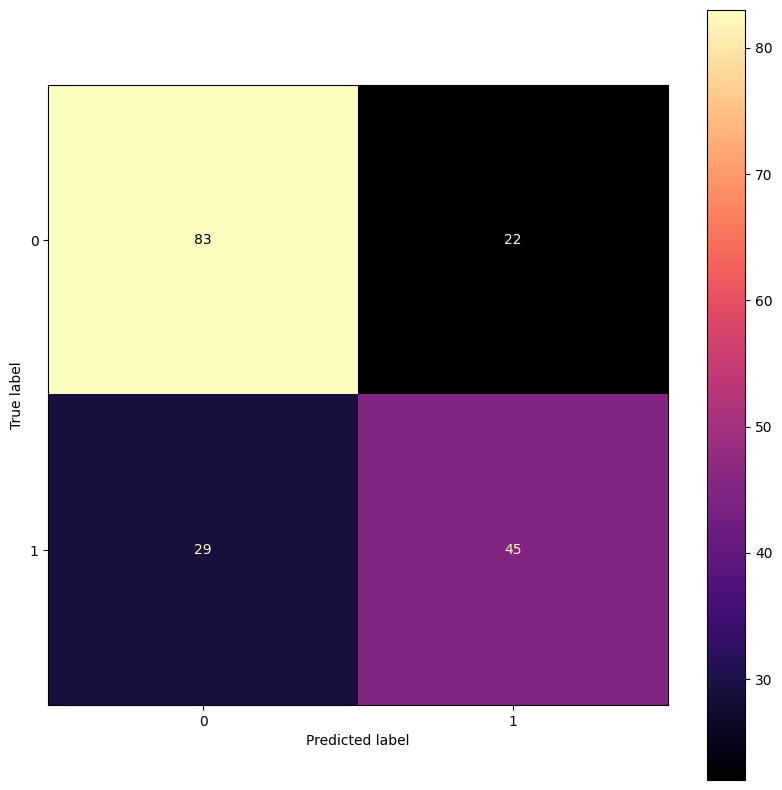

In [27]:
labels_titanic_predict = clf1.predict(titanic_test)

metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='magma')

<h2>Decision Tree (tree.DecisionTreeClassifier) with the default parameters.</h2>

In [28]:
classifier = DecisionTreeClassifier(criterion="entropy") # default measure of chaos is gini in scikit-learn
if (os.path.exists('models/DT1_model.pickle')):
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/DT1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
pickle_in.close()

Accuracy: 0.7430167597765364
Precision (Weighted): 0.7441586283874245
Recall (Weighted): 0.7430167597765364
F1 Score (Weighted): 0.743494485030798
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       105
           1       0.68      0.70      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179



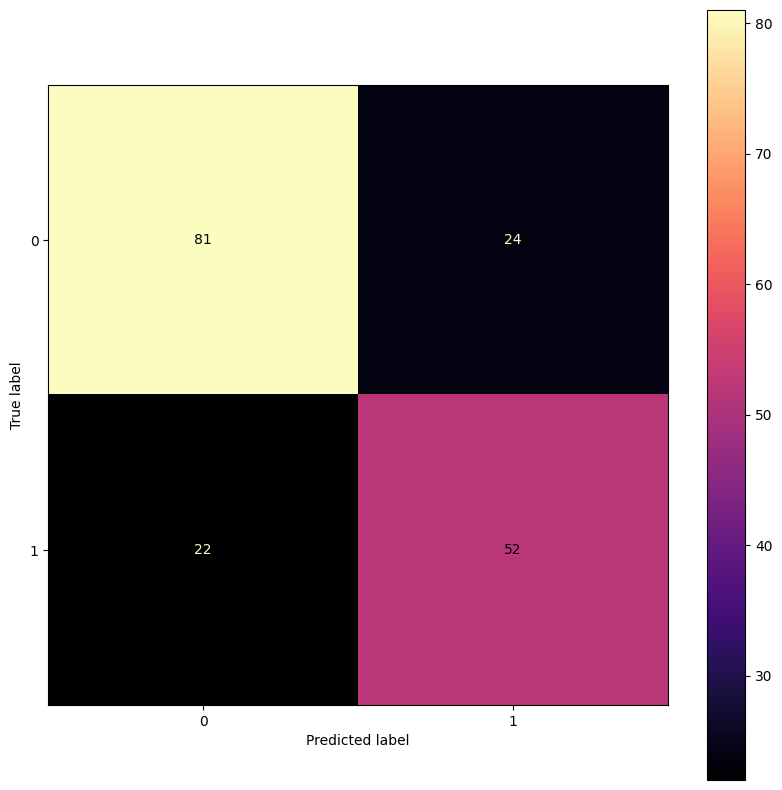

In [29]:
labels_titanic_predict = clf1.predict(titanic_test)

metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='magma')


[Text(0.3682383040935672, 0.9772727272727273, 'Sex <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(0.17690058479532164, 0.9318181818181818, 'Pclass <= 2.5\nentropy = 0.829\nsamples = 245\nvalue = [64, 181]'),
 Text(0.08187134502923976, 0.8863636363636364, 'PassengerId <= 301.0\nentropy = 0.235\nsamples = 130\nvalue = [5, 125]'),
 Text(0.04678362573099415, 0.8409090909090909, 'Age <= 2.5\nentropy = 0.513\nsamples = 35\nvalue = [4, 31]'),
 Text(0.03508771929824561, 0.7954545454545454, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05847953216374269, 0.7954545454545454, 'Fare <= 29.392\nentropy = 0.431\nsamples = 34\nvalue = [3, 31]'),
 Text(0.04678362573099415, 0.75, 'Fare <= 28.231\nentropy = 0.65\nsamples = 18\nvalue = [3, 15]'),
 Text(0.03508771929824561, 0.7045454545454546, 'Age <= 28.0\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.023391812865497075, 0.6590909090909091, 'Ticket <= 163.0\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0

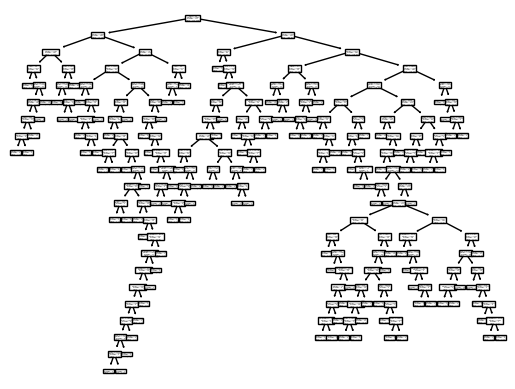

In [30]:
plot_tree(clf1, feature_names= titanic_train.columns)

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.</h2>

In [31]:
classifier = MLPClassifier()
if (os.path.exists('models/MLP1_model.pickle')):
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/MLP1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
pickle_in.close()

In [32]:
# This can be used 
# print(np.shape(titanic_train))
# print(np.shape(labels_train))

Accuracy: 0.7430167597765364
Precision (Weighted): 0.7533685097251966
Recall (Weighted): 0.7430167597765364
F1 Score (Weighted): 0.7448662603690536
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       105
           1       0.66      0.77      0.71        74

    accuracy                           0.74       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.75      0.74      0.74       179



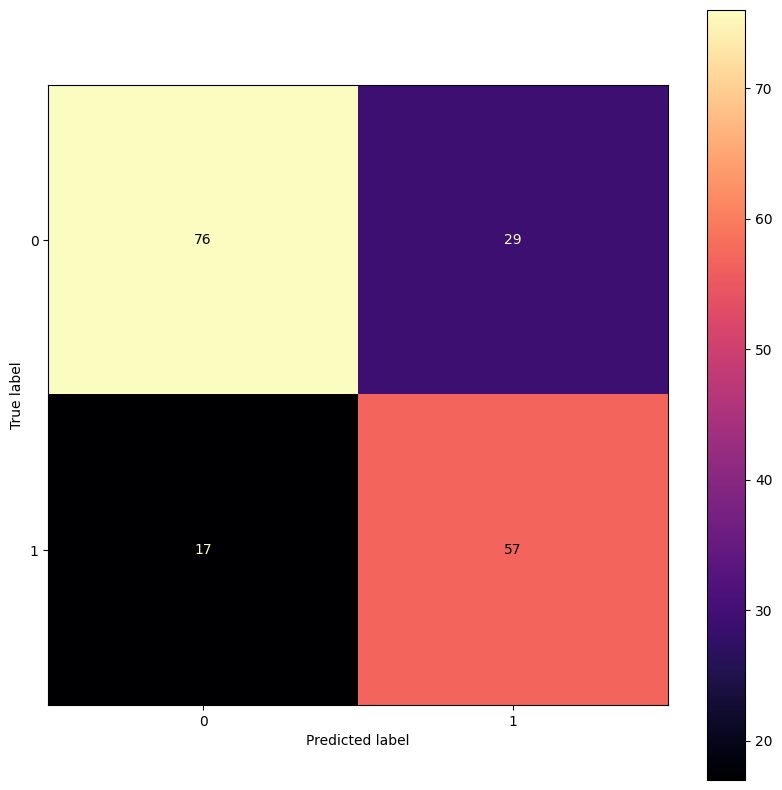

In [33]:
labels_titanic_predict = clf1.predict(titanic_test)
metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='magma')

<h1>Your Turn</h1>

Go find a model you want to use on this data<br>

Simple things you can try:
* manually selecting hyperparameters
* change the features
* try unsupervised learning 

If you don't know where to start feel free to discuss with myself or those around you!

All models and fancy things can be found here 
https://scikit-learn.org/stable/modules/classes.html

In [34]:
classifier = ModelClass # define a model 
modelName = "UserModel" # name your model

if (os.path.exists(f'models/{modelName}.pickle')):
    pickle_in = open(f'models/{modelName}.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open(f'models/{modelName}.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open(f'models/{modelName}.pickle','rb')
    clf1 = pickle.load(pickle_in)
pickle_in.close()

NameError: name 'ModelClass' is not defined

<h1>Model Refinement Through Hyperparameter Search</h1>

Idea is to take find hyperparameter values that will improve the performance of the model's prediction

https://scikit-learn.org/stable/modules/classes.html#hyper-parameter-optimizers 

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV</h2>

Hyperparameters are called attributes in scikit-learn documentation <br>
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB


In [ ]:
parameters = {"alpha":(0.5,0,0.36,1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters,n_jobs=-1, scoring = "recall")

if (os.path.exists('models/MNB1GridCV_model.pickle')):
    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/MNB1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
pickle_in.close()


pickle file used


Best estimator: MultinomialNB(alpha=0.5)
Accuracy: 0.7150837988826816
Precision (Weighted): 0.7123686733928125
Recall (Weighted): 0.7150837988826816
F1 Score (Weighted): 0.7126068335103507
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       105
           1       0.67      0.61      0.64        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



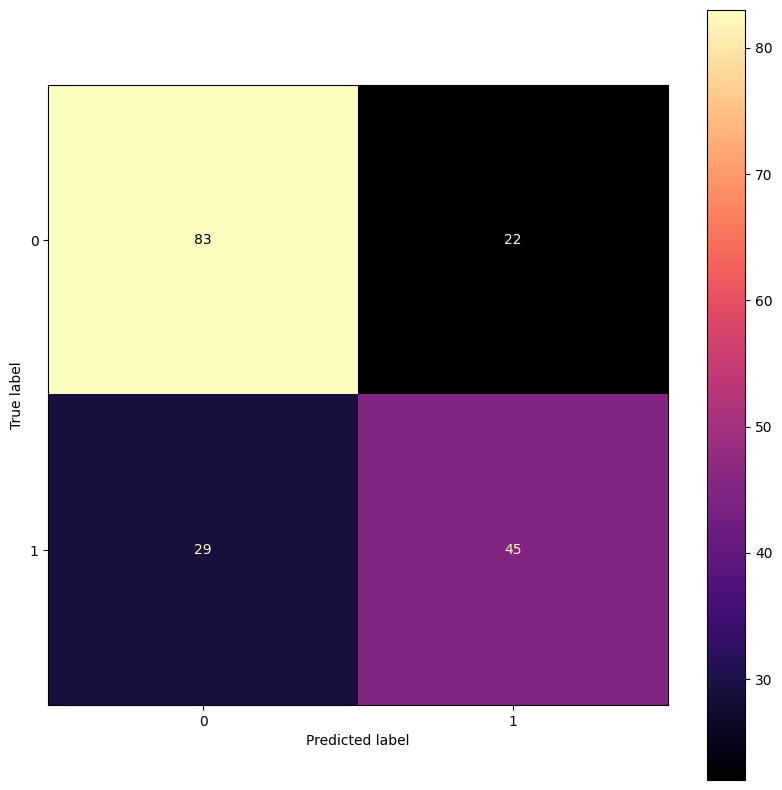

In [ ]:
labels_titanic_predict = clf1.predict(titanic_test)

print(f"Best estimator: {clf1.best_estimator_}")
metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='magma')

<h2>Decision Tree Classifier found using GridSearchCV</h2>

Hyperparameters are called attributes in scikit-learn documentation <br>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 

In [ ]:
parameters = {"criterion":("gini","entropy"),"max_depth":(100,3,10),"min_samples_split":(12,5,30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters,n_jobs=-1, scoring = "recall")

if (os.path.exists('models/DT1GridCV_model.pickle')):
    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/DT1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
pickle_in.close()

pickle file used


Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=30)
Accuracy: 0.7988826815642458
Precision (Weighted): 0.7987081005586593
Recall (Weighted): 0.7988826815642458
F1 Score (Weighted): 0.7961666703468987
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



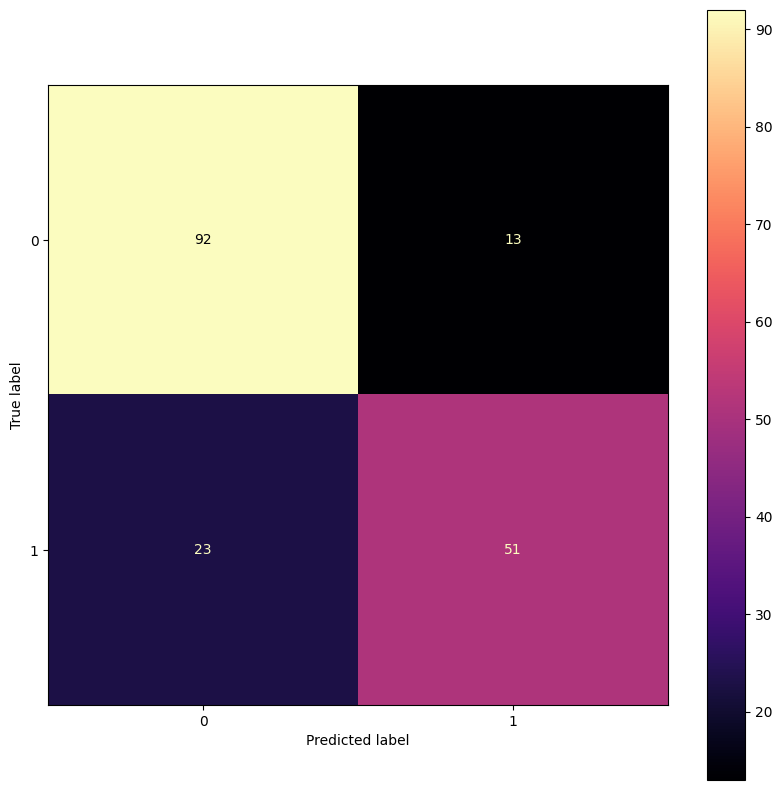

In [ ]:
labels_titanic_predict = clf1.predict(titanic_test)

print(f"Best estimator: {clf1.best_estimator_}")
metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='magma')

[Text(0.5, 0.875, 'Sex <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(0.25, 0.625, 'Pclass <= 2.5\nentropy = 0.829\nsamples = 245\nvalue = [64, 181]'),
 Text(0.125, 0.375, 'PassengerId <= 301.0\nentropy = 0.235\nsamples = 130\nvalue = [5, 125]'),
 Text(0.0625, 0.125, 'entropy = 0.513\nsamples = 35\nvalue = [4, 31]'),
 Text(0.1875, 0.125, 'entropy = 0.084\nsamples = 95\nvalue = [1, 94]'),
 Text(0.375, 0.375, 'Fare <= 23.35\nentropy = 1.0\nsamples = 115\nvalue = [59, 56]'),
 Text(0.3125, 0.125, 'entropy = 0.979\nsamples = 94\nvalue = [39, 55]'),
 Text(0.4375, 0.125, 'entropy = 0.276\nsamples = 21\nvalue = [20, 1]'),
 Text(0.75, 0.625, 'Cabin <= 145.0\nentropy = 0.694\nsamples = 467\nvalue = [380, 87]'),
 Text(0.625, 0.375, 'Age <= 17.5\nentropy = 0.977\nsamples = 85\nvalue = [50, 35]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6875, 0.125, 'entropy = 0.942\nsamples = 78\nvalue = [50, 28]'),
 Text(0.875, 0.375, 'Age <= 13.0\nentropy 

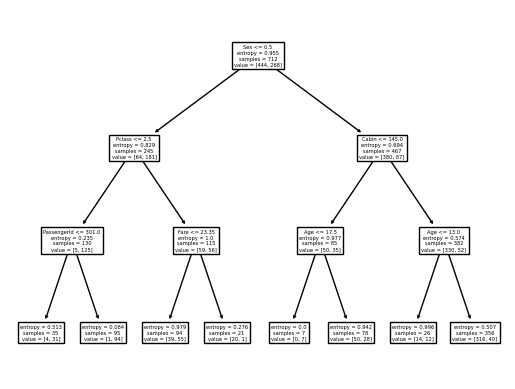

In [ ]:
plot_tree(clf1.best_estimator_, feature_names= titanic_train.columns)

<h2>Multi-Layered Perceptron found using GridSearchCV</h2>

Hyperparameters are called attributes in scikit-learn documentation <br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier 

In [ ]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((11),(121,11),(11,1,3,7)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True, verbose=True, max_iter=50)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1, scoring = "recall")
skip=False # when set to False this search will execute

if(not skip):
    if (os.path.exists('models/MLP1GridCV_model.pickle')):
        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(titanic_train.values, labels_train.values)
        with open('models/MLP1GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)
else:
    print("skipped")

pickle_in.close()

pickle file used


Best estimator: MLPClassifier(early_stopping=True, hidden_layer_sizes=11, max_iter=50,
              verbose=True)
Accuracy: 0.5865921787709497
Precision (Weighted): 0.5627046811789636
Recall (Weighted): 0.5865921787709497
F1 Score (Weighted): 0.5431078005379681
              precision    recall  f1-score   support

           0       0.61      0.84      0.70       105
           1       0.50      0.23      0.31        74

    accuracy                           0.59       179
   macro avg       0.55      0.53      0.51       179
weighted avg       0.56      0.59      0.54       179



C:\Users\chanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


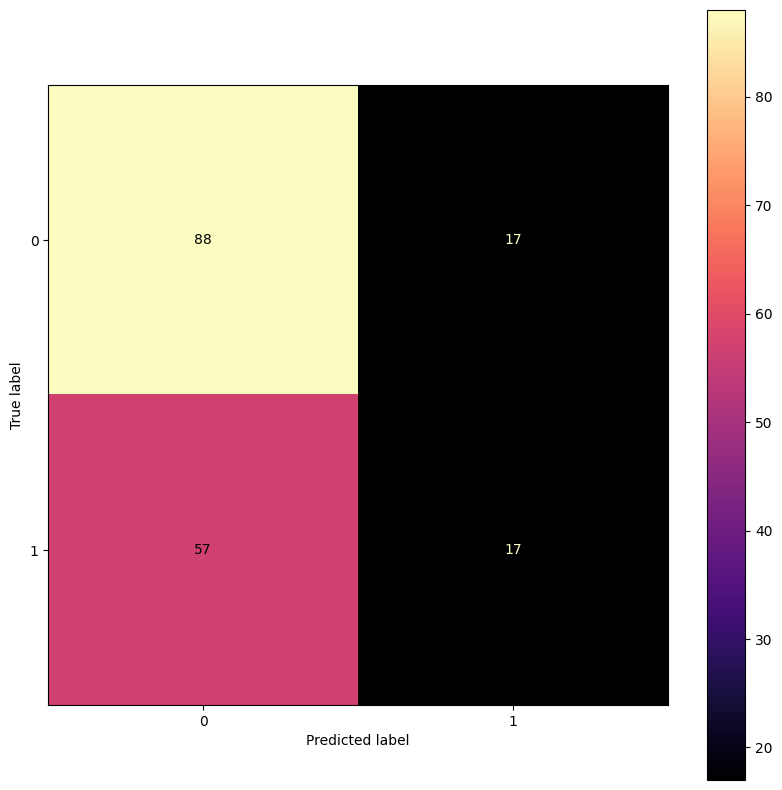

In [ ]:
if (os.path.exists('models/MLP1GridCV_model.pickle') and not skip):
    labels_titanic_predict = clf1.predict(titanic_test)
    print(f"Best estimator: {clf1.best_estimator_}")
    metrics(labels_test, labels_titanic_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
    fig, ax = plt.subplots(figsize=(10,10))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

In [ ]:
make each model take independent names so we can graph recall or precision